<a href="https://colab.research.google.com/github/ariemay/ZodiacSign-Pytorch-CNN/blob/master/Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Upload zip file signs.zip to 'My Drive' 
2. Mount your drive using code below. 

In [0]:
!

In [5]:
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Reinitialized existing Git repository in /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSign-Pytorch-CNN/.git/


Initialized empty Git repository in /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSign-Pytorch-CNN/.git/
[master (root-commit) 7473759] first commit
 1 file changed, 1 insertion(+)
 create mode 100644 README.md
fatal: could not read Username for 'https://github.com': No such device or address


fatal: could not read Username for 'https://github.com': No such device or address


 3. Unzip the file:



In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs.zip" -d "/content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data"

Archive:  /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs.zip
   creating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/
   creating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/
   creating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/pig/
  inflating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/pig/00000563.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/pig/00000205.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/pig/00000211.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/pig/00000577.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/pig/00000588.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs/valid/pig/00000

You just unziped your folder. Take a look at the structure, and pictures

In [0]:
import os
os.chdir("/content/")

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

Define transforms, rezise, rotate slightly, preform horizontal flip

In [0]:
data_dir = "/content/drive/My Drive/Colab Notebooks/Udacity/ZodiacSigns/data/signs"

batch_size = 16
# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize([37,37]),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)

________________________________

In [0]:
# Define classes
classes = trainloader.dataset.classes
classes

['dog',
 'dragon',
 'goat',
 'horse',
 'monkey',
 'ox',
 'pig',
 'rabbit',
 'ratt',
 'rooster',
 'snake',
 'tiger']

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
import numpy as np

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

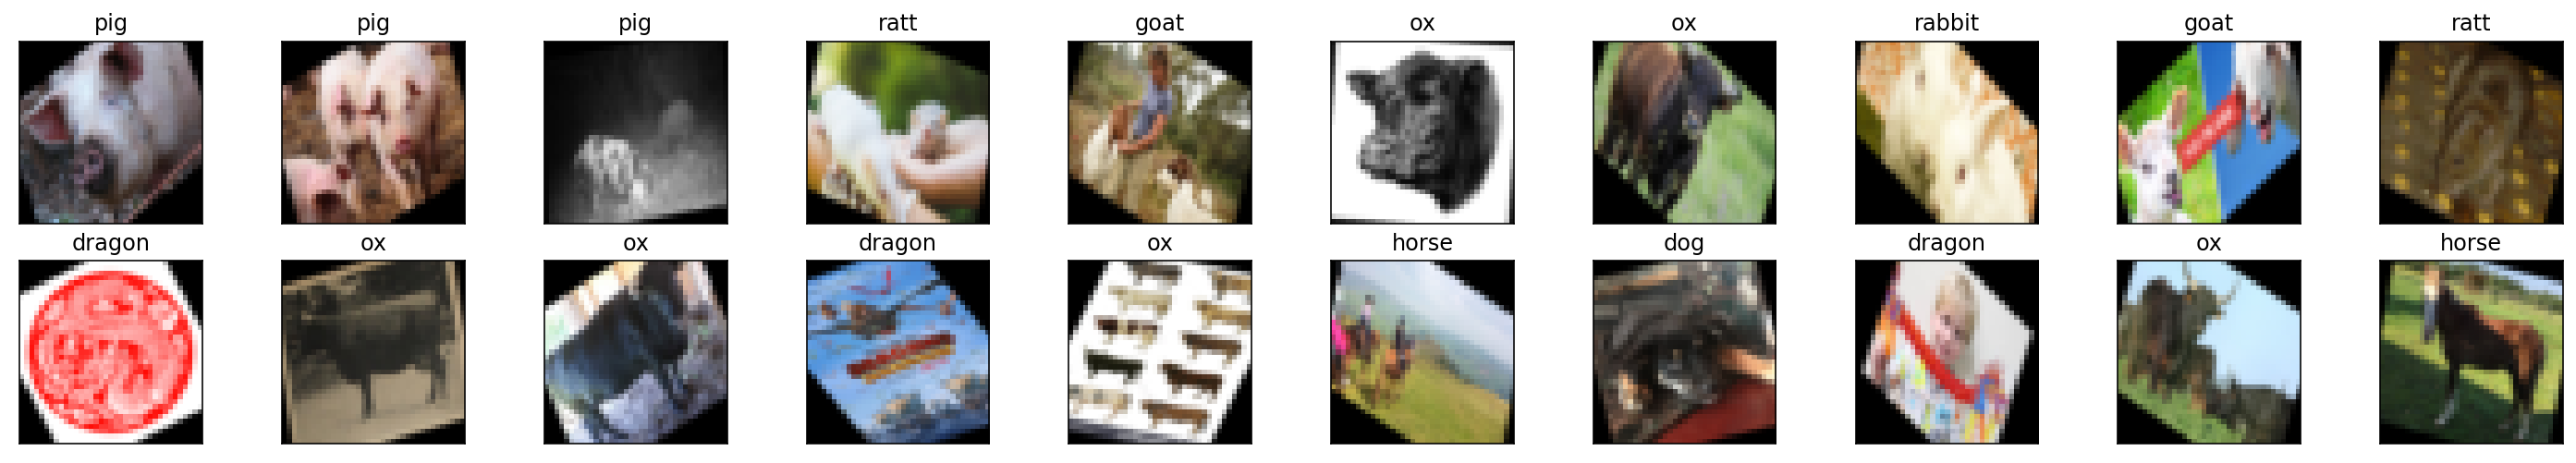

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

# images.shape
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(classes[labels[idx]])

In [0]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

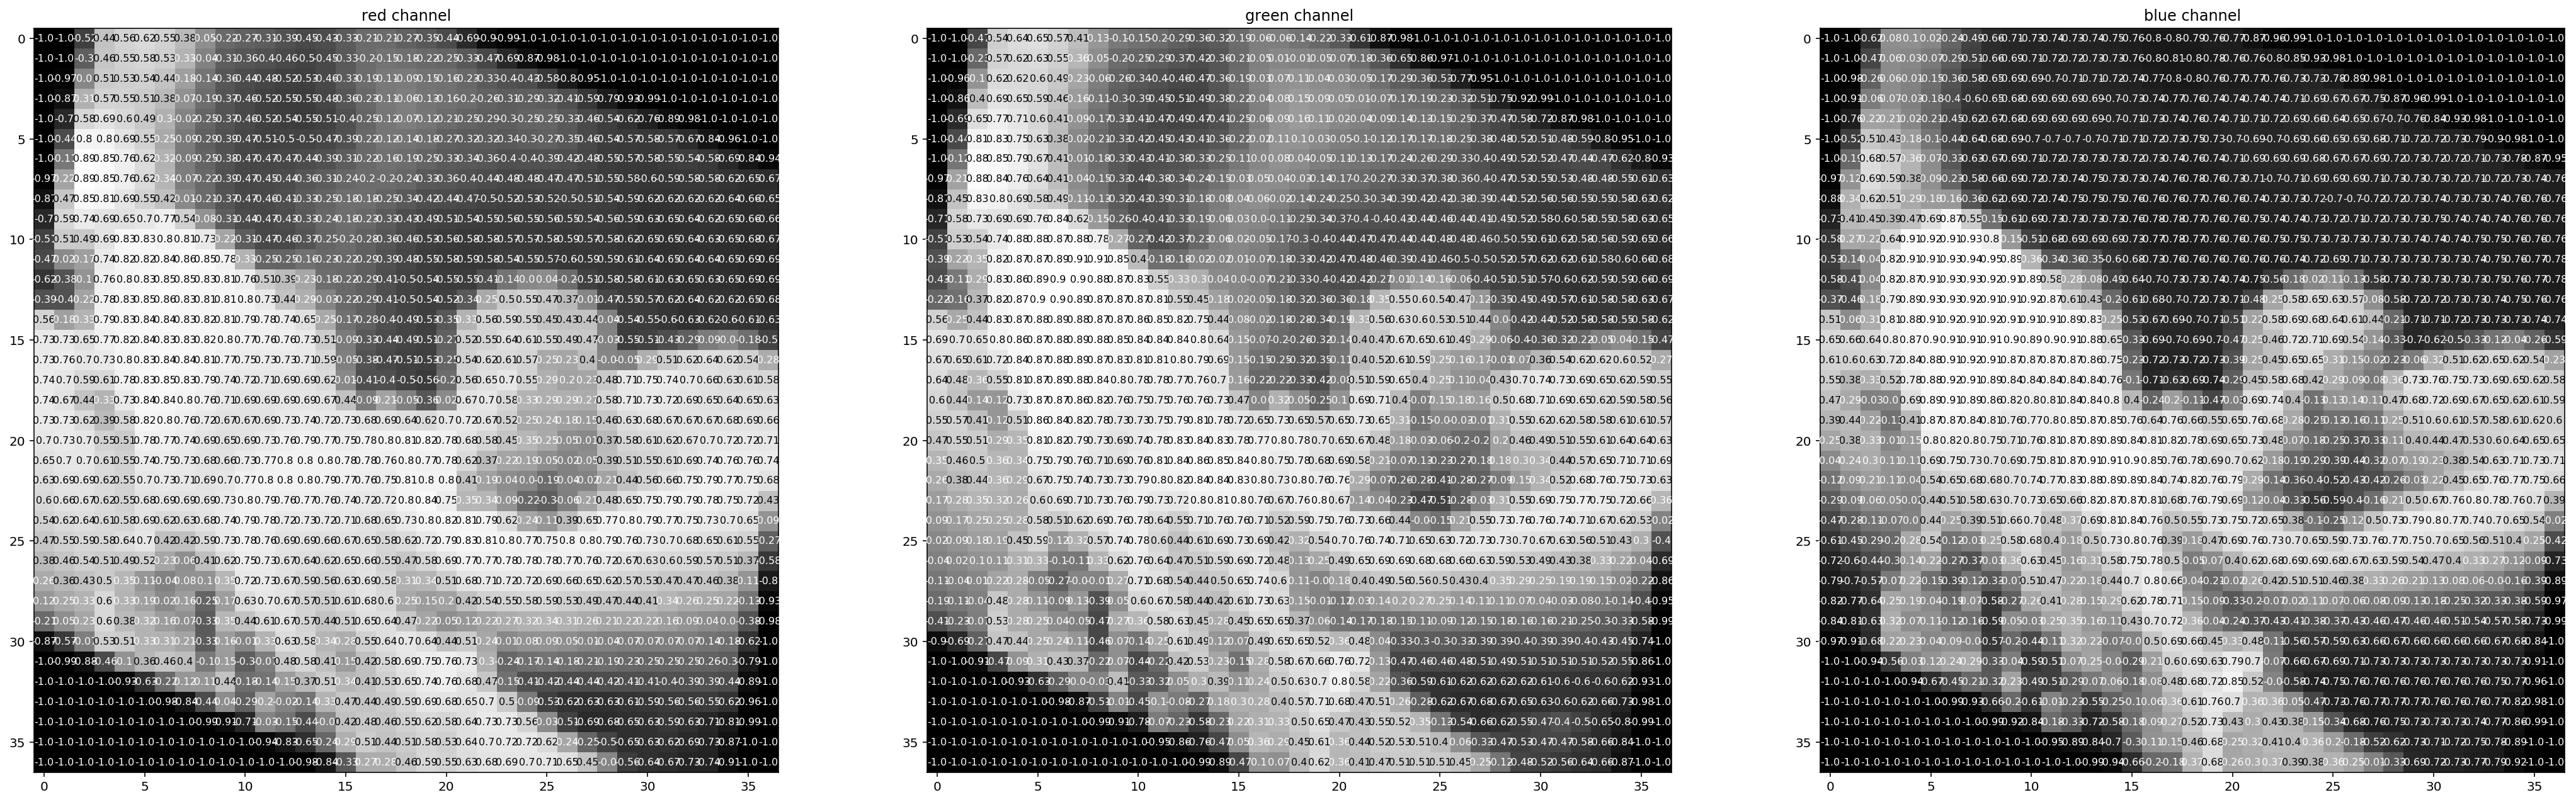

In [0]:
fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

In [0]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define CNN architecture
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # convolutional layer (sees 32x32x3 image tensor)
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    # convolutional layer (sees 16x16x16 tensor)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    # convolutional layer (sees 8x8x32 tensor)
    self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
    # max pooling layer
    self.pool = nn.MaxPool2d(2, 2)
    # linear layer (64 * 4 * 4 -> 500)
    self.fc1 = nn.Linear(64 * 4 * 4, 500)
    # linear layer (500 -> 10)
    self.fc2 = nn.Linear(500, 10)
    # dropout layer (p=0.25)
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    # add sequence of convolutional and max pooling layers
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    # flatten image input
    x = x.view(-1, 64 * 4 * 4)
    # add dropout layer
    x = self.dropout(x)
    # add 1st hidden layer, with relu activation function
    x = F.relu(self.fc1(x))
    # add dropout layer
    x = self.dropout(x)
    # add 2nd hidden layer, with relu activation function
    x = self.fc2(x)
    return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [0]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [0]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in trainloader:
        # move tensors to GPU if CUDA is available
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in validloader:
        # move tensors to GPU if CUDA is available
        # if train_on_gpu:
        #     data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(trainloader.sampler)
    valid_loss = valid_loss/len(validloader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

RuntimeError: ignored